# Using Numpy to Fit a Degree 3 Polynomial on a Sine Curve

In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

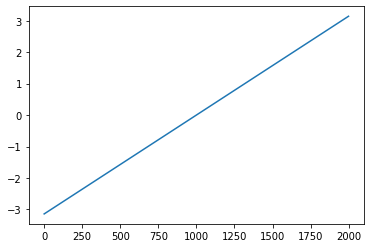

In [2]:
x = np.linspace(-math.pi,math.pi,2000)
len(x)
plt.plot(x)
plt.show()

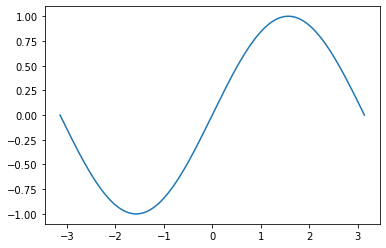

In [3]:
y=np.sin(x)
plt.plot(x,y)
plt.show()

0.00012823663347003467 1.4144348735879964 1.6113450893550623 -0.3905147536054339


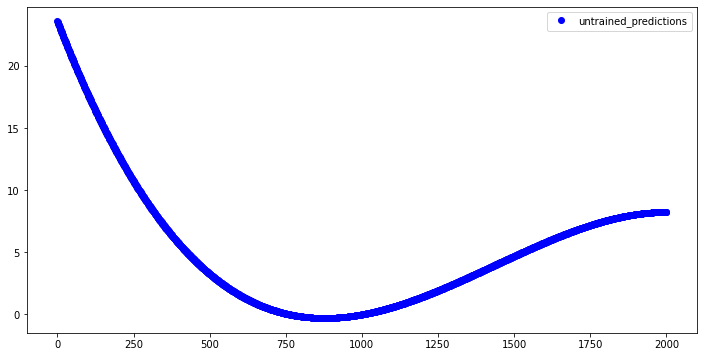

In [4]:
a=np.random.randn()
b=np.random.randn()
c=np.random.randn()
d=np.random.randn()
print(a,b,c,d)

untrained_predictions= a+b*x+c*x**2+d*x**3
plt.figure(figsize=(12,6))
plt.plot(untrained_predictions, 'bo', label='untrained_predictions')
plt.legend()
plt.show()

In [5]:
learning_rate= 1e-6
print(learning_rate)

1e-06


In [6]:
from datetime import datetime
start_time = datetime.now()

for t in range(2000):
  y_predicted = a + b*x + c*x**2 + d*x**3
  loss= np.square(y-y_predicted).sum() #Total Squared Error = Loss Function
  if t%100==99:
    print(t,loss)
  
  grad_y_pred = 2.0 * (y_predicted - y)
  grad_a = grad_y_pred.sum()
  grad_b = (grad_y_pred * x).sum()
  grad_c = (grad_y_pred * x ** 2).sum()
  grad_d = (grad_y_pred * x ** 3).sum()

  a -= learning_rate * grad_a
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d

print(f'Result: {a} + {b} x + {c} x^2 + {d} x^3')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

99 296.80599119644853
199 201.3796241922506
299 137.65925059253576
399 95.08266155614933
499 66.61646953773045
599 47.57211370401692
699 34.82258120124599
799 26.281239086343103
899 20.554929768190167
999 16.712965389580244
1099 14.133232523039185
1199 12.399620170621779
1299 11.233621730433027
1399 10.448701809663895
1499 9.919834690038531
1599 9.563158832558484
1699 9.322379903135552
1799 9.159678214216555
1899 9.049624402087371
1999 8.975105310619231
Result: -0.00849760935454254 + 0.8661399784111763 x + 0.0014659790144885964 x^2 + -0.09466733419395221 x^3
Duration: 0:00:00.847996


In [7]:
y_predicted

array([ 0.22022861,  0.21412041,  0.20802985, ..., -0.19618303,
       -0.20221567, -0.2082659 ])

In [8]:
y

array([-1.22464680e-16, -3.14315906e-03, -6.28628707e-03, ...,
        6.28628707e-03,  3.14315906e-03,  1.22464680e-16])

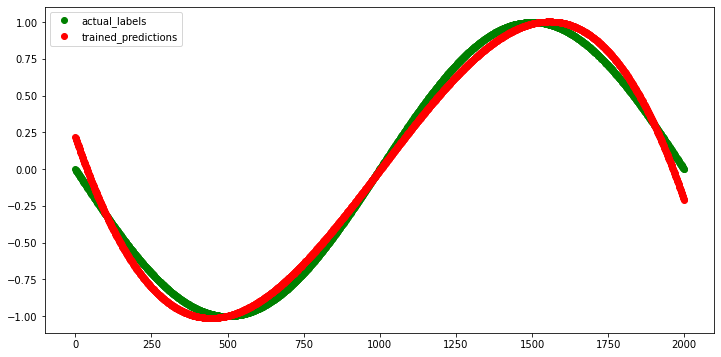

In [9]:
plt.figure(figsize=(12,6))
plt.plot(y, 'go', label='actual_labels')
plt.plot(y_predicted, 'ro', label='trained_predictions')
plt.legend()
plt.show()


# Replacing Numpy Array With Tensor

In [10]:
start_time = datetime.now()
dtype = torch.float
device = torch.device("cpu")
#device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

99 931.879638671875
199 661.2608642578125
299 470.0157470703125
399 334.85211181640625
499 239.3161163330078
599 171.78451538085938
699 124.04498291015625
799 90.29469299316406
899 66.4328842163086
999 49.561256408691406
1099 37.63141632080078
1199 29.19547462463379
1299 23.229881286621094
1399 19.01103401184082
1499 16.027372360229492
1599 13.91716480255127
1699 12.424656867980957
1799 11.368998527526855
1899 10.622305870056152
1999 10.094137191772461
Result: y = -0.03773033246397972 + 0.8591946363449097 x + 0.006509108003228903 x^2 + -0.09367941319942474 x^3
Duration: 0:00:00.265954


# Tensors and Autograd

In [11]:
import torch
import math
start_time = datetime.now()
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

99 501.6706237792969
199 341.8553466796875
299 234.09100341796875
399 161.35443115234375
499 112.21245574951172
599 78.97769165039062
699 56.47776412963867
799 41.22937774658203
899 30.884233474731445
999 23.857994079589844
1099 19.08065414428711
1199 15.828744888305664
1299 13.612695693969727
1399 12.100784301757812
1499 11.068132400512695
1599 10.36199951171875
1699 9.878583908081055
1799 9.547262191772461
1899 9.319929122924805
1999 9.163759231567383
Result: y = 0.015542960725724697 + 0.8456160426139832 x + -0.002681421348825097 x^2 + -0.09174798429012299 x^3
Duration: 0:00:00.510986


In [12]:
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [13]:
xx.shape

torch.Size([2000, 3])

In [14]:
x.shape

torch.Size([2000])

In [15]:
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [16]:
x

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])

In [17]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)


In [18]:
x=torch.tensor([1,2,3])
x

tensor([1, 2, 3])

In [19]:
x.unsqueeze(-1)

tensor([[1],
        [2],
        [3]])

**[Pytorch Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial)**

Let's create the environment!

In [20]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

PyTorch has two primitives to work with data: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.

The torchvision.datasets module contains Dataset objects for many real-world vision data like CIFAR, COCO (full list here). In this tutorial, we use the FashionMNIST dataset. Every TorchVision Dataset includes two arguments: transform and target_transform to modify the samples and labels respectively

We load the FashionMNIST Dataset with the following parameters:
- root is the path where the train/test data is stored,
- train specifies training or test dataset,
- download=True downloads the data from the internet if it’s not available at root.
- transform and target_transform specify the feature and label transformations

In [21]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)


In [22]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [23]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [24]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [25]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [26]:
X.flatten() # Flatten will simply convert input data into a matrix or tensor of rank 2 having: rows=batch size ; columns=number of dimensions in input (28*28)
X.size()

torch.Size([64, 1, 28, 28])

We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

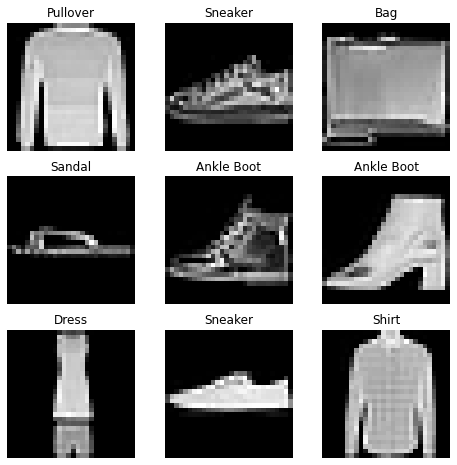

In [27]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [29]:
# # Below, first the child class 'NeuralNetwork' will be implemented
# # Since we have subclassed 'NeuralNetwork', we must want it to inherit features and methods of parent class i.e. nn.Module 
# # super() serves the purpose of inheriting superclasss(parent) in a subclass(child) 

class NeuralNetwork(nn.Module): # we are inheriting NeuralNetwork class from nn.module
    def __init__(self):
        super(NeuralNetwork, self).__init__() # pass NeuralNetwork and object that youll instantiate later on to parent class i.e. nn.module
        self.flatten = nn.Flatten()  # flatten will covert X into a tensor of rank 2
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x) #logits are unscaled proba values for each class; softmax scales them bw 0&1 (such that sum_proba for all classes=1)
        return logits
# Let's instantiate an object 'model' of class 'NeuralNetwork' that itself is a child of nn.Module
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [31]:
# counting total trainable params in our network
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad) #(784*512+512)+(512*512+512)+(512*10+10)=669,706
print(pytorch_total_params)

669706


In [32]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset) # 60,000
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad() #Sets the gradients of all optimized torch.Tensors to zero.
        loss.backward() #loss.backward() computes dloss/dx for every parameter x which has requires_grad=True. 
        optimizer.step() #Performs a single optimization step (parameter update).

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss}  [{current}/{size}]")

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [33]:
train(train_dataloader,model,loss_fn,optimizer)

loss: 2.302320718765259  [0/60000]
loss: 2.2926065921783447  [6400/60000]
loss: 2.2746357917785645  [12800/60000]
loss: 2.2722156047821045  [19200/60000]
loss: 2.2510101795196533  [25600/60000]
loss: 2.2144148349761963  [32000/60000]
loss: 2.217658758163452  [38400/60000]
loss: 2.17934513092041  [44800/60000]
loss: 2.186582088470459  [51200/60000]
loss: 2.150538206100464  [57600/60000]


In [34]:
# batch size confirmation
total_batches=0
for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        total_batches+=1
print(total_batches)


938


We also check the model’s performance against the test dataset to ensure it is learning.

Remeber, it's pointless to do back propagation on test set. So, for the test set, we will just calculate the forwards pass step to get predictions. These predictions will help us then compute the accuracy of our model.



Usually logits is the output tensor of a classification network, whose content is the unnormalized (not scaled between 0 and 1) probabilities.

`argmax` gives you the index of maximum value along the specified axis.

You can convert logits to a pseudo-probability (that's just a tensor whose values sum up to 1) and feed it as input to argmax:
`argmax(tf.nn.softmax(logits), 1)`

In [35]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset) #10,000
    num_batches = len(dataloader) #157 (10,000/64)
    model.eval() # evaluation only!
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #argmax gives you the index of maximum value along the specified axis.
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [36]:
test(test_dataloader,model,loss_fn)

Test Error: 
 Accuracy: 50.6%, Avg loss: 2.149087 



In [37]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.161111831665039  [0/60000]
loss: 2.154024839401245  [6400/60000]
loss: 2.0943093299865723  [12800/60000]
loss: 2.115065097808838  [19200/60000]
loss: 2.0557703971862793  [25600/60000]
loss: 1.9918354749679565  [32000/60000]
loss: 2.010065793991089  [38400/60000]
loss: 1.9259191751480103  [44800/60000]
loss: 1.9396157264709473  [51200/60000]
loss: 1.8643336296081543  [57600/60000]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.867965 

Epoch 2
-------------------------------
loss: 1.899093747138977  [0/60000]
loss: 1.8758705854415894  [6400/60000]
loss: 1.752925157546997  [12800/60000]
loss: 1.8035523891448975  [19200/60000]
loss: 1.692491054534912  [25600/60000]
loss: 1.6352667808532715  [32000/60000]
loss: 1.6531484127044678  [38400/60000]
loss: 1.5500175952911377  [44800/60000]
loss: 1.581130862236023  [51200/60000]
loss: 1.4806642532348633  [57600/60000]
Test Error: 
 Accuracy: 61.4%, Avg loss: 1.504010 

Epoch 3
--------------------------